In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as  plt
import matplotlib.pyplot as  plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline
import warnings
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("Elon_musk.csv",encoding='cp1252')
df.head(20)

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [5]:
df.Text = df.Text.astype(str)

In [6]:
# Clean The Data Using Regex
# Result = re.sub(pattern,repl,string,count=0,flags=0)

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+","",text)
    text = re.sub(r"#","",text)
    text = re.sub(r"RT[\s]+", "",text)
    text = re.sub(r"https?:\/\/\S+", "", text)
    text = re.sub(r"_[A-Za-z0-9]", "", text)
    
    return text

df["Text"] = df["Text"].apply(cleantext)
df.head()

,Text
0,I’m an alien
1,Aarmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


## Vader Method

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid= SentimentIntensityAnalyzer()

In [20]:
sid.polarity_scores(df.Text.iloc[2])

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [22]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sid.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0:
        return 'negative'
    else : 
        return 'neutral'
    
def get_sentiment(review):
    return pd.Series([sid.polarity_scores(review),get_senti_class(review)])


In [23]:
#Applying function to all tweets
df[["Scores", "Sentiment"]] = df.Text.apply(get_sentiment)
df

,Text,Scores,Sentiment
0,I’m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Aarmack Ray tracing on Cyberpunk with HDR is n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",positive
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
4,Congratulations Tesla China for amazing execu...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",positive
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative
1995,Make sure to read ur terms &amp; conditions b...,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",positive
1996,Samwise Gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...",negative


In [25]:
df.Sentiment.value_counts()

neutral     888
positive    880
negative    231
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

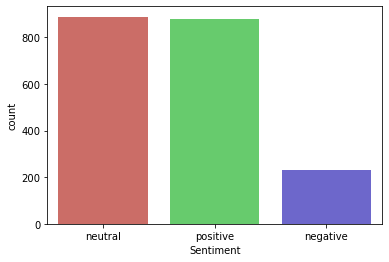

In [27]:
sns.countplot(df.Sentiment,palette='hls')

In [28]:
review_str = ' '.join(df['Text'].tolist())

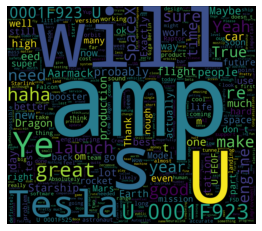

In [40]:
text = df.Text[0]

# Create and genrate a word cloud image
wordCloud = WordCloud(background_color ="black",max_words=500,width=1600,height=1400).generate(review_str)

#figure(figsize=(2,3),dpi=400)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
#Positive words ,Choose the path for posiitive words stored in systems
with open("positive-words (1).txt","r")as pos:
   password = pos.read().split("\n")

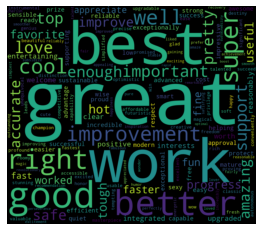

In [43]:
ip_pos_in_pos = " ".join([w for w in review_str.split() if w in password])
wordcloud_pos = WordCloud(background_color='black',width=1600,height=1400).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos,interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
#Negative words ,Choose the path for posiitive words stored in systems
with open("negative-words (1).txt","r")as neg:
    negwords = neg.read().split("\n")
    

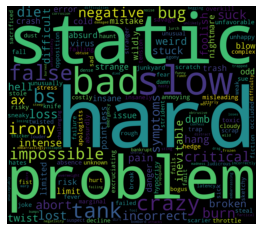

In [50]:
ip_neg_in_neg = " ".join ([w for w in review_str.split() if w in negwords])
wordcloud_neg = WordCloud(background_color='black',width=1600,height=1400).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg,interpolation="bilinear")
plt.axis("off")
plt.show()
# Negative words  ,choose path for -ve words stored in system
with open("negative-words (1).txt","r")as neg:
    negwords = neg.read().split("\n")

In [51]:
# Stop Words,Choose the path for stop words stored in system
with open("stop.txt","r")as stop:
    stopwords = stop.read().split("\n")


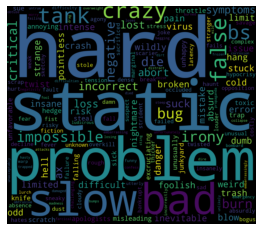

In [53]:
stopwords = " ".join([w for w in review_str.split() if w in negwords])
wordcloud_stop = WordCloud(background_color="black",width=1600,height=1400).generate(stopwords)
plt.imshow(wordcloud_stop,interpolation="bilinear")
plt.axis("off")
plt.show()